<div style="line-height:0.5">
<h1 style="color:#0FA345 "> Support Vector Machines for Classification 1 </h1>
</div>
<div style="line-height:1.2">
<h4> 4 Examples with sklearn SVC. <br>
    - Find the hyperplane that separates the categories <br>
    - Map data into higher dimension
</h4>
<div style="margin-top: -8px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> markdown margin-bottom: 0; + Grid Search + Kernels + numpy vstack + pairplot + interactive
</span>
</div>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interactive

<h2 style="color:#0FA345 "> <u> Example # 1 </u> </h1>

In [4]:
best_grade_in = ['Math', 'English', 'Science', 'History', 'Art', 'Latin', 'Physics', 'History', 'Language']
old_subjects = [0, 1, 2]
backgrounds  =  ['Scientific', 'Technical', 'Arts', 'Letters']
grades = ['not_passed', 'ok', 'good', 'excellent']

##### Generate a pandas DataFrame with random values
data = {
    'best_grade_in': np.random.choice(best_grade_in, size=5000),
    'old_subject': np.random.choice(old_subjects, size=5000),
    'average': np.random.uniform(6, 30, size=5000),
    'background': np.random.choice(backgrounds, size=5000),
}

################ Assign grades based on specific conditions
grades = []
for i in range(5000):
    if data['average'][i] >= 20:
        if data['best_grade_in'][i] in ['Math', 'Science']:
            grades.append('excellent')
        elif data['best_grade_in'][i] in ['English', 'History']:
            grades.append('good')
        else:
            grades.append('ok')
    elif data['average'][i] >= 15:
        if data['best_grade_in'][i] in ['Math', 'Science'] and data['background'][i] == 'Scientific':
            grades.append('excellent')
        elif data['best_grade_in'][i] in ['Math', 'Science']:
            if data['old_subject'][i] == 0:
                grades.append('good')
            else:
                grades.append('ok')
        elif data['best_grade_in'][i] in ['English', 'History'] and data['background'][i] == 'Letters':
            grades.append('good')
        else:
            grades.append('ok')
    else:
        grades.append('not_passed')

data['grade'] = grades

df = pd.DataFrame(data)
df[:10]

,best_grade_in,old_subject,average,background,grade
0,Physics,2,17.190143,Scientific,ok
1,Art,2,16.429005,Scientific,ok
2,Language,0,12.920998,Letters,not_passed
3,Science,1,11.815164,Letters,not_passed
4,History,1,14.706769,Technical,not_passed
5,History,2,12.336349,Letters,not_passed
6,History,2,17.644734,Arts,ok
7,Latin,2,17.980977,Scientific,ok
8,Latin,0,10.530774,Technical,not_passed
9,History,1,15.722221,Technical,ok


In [5]:
## Encoder for the target variable
le = LabelEncoder()
df['grade'] = le.fit_transform(df['grade'])

## Convert categorical vars performing one-hot encoding => create 18 features 
df = pd.get_dummies(df, columns=['best_grade_in', 'old_subject', 'average', 'background'])

## Create samples and targets + split into train and test subsets
X = df.drop('grade', axis=1)
y = df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

## Predict
pred_clf = clf.predict(X_test)
pred_clf[:10]

[1 1 0 3 3 3 3 1 1 3]


In [6]:
X_train[:6]

,best_grade_in_Art,best_grade_in_English,best_grade_in_History,best_grade_in_Language,best_grade_in_Latin,best_grade_in_Math,best_grade_in_Physics,best_grade_in_Science,old_subject_0,old_subject_1,...,average_29.96279525879278,average_29.96597453827676,average_29.983221854746027,average_29.985071280045297,average_29.9970658068688,average_29.99970903383863,background_Arts,background_Letters,background_Scientific,background_Technical
4227,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4676,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3671,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4193,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2968,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
y

0       3
1       3
2       2
3       2
4       2
       ..
4995    3
4996    2
4997    2
4998    2
4999    2
Name: grade, Length: 5000, dtype: int64

In [8]:
precision2 = precision_score(y_test, pred_clf, average='weighted', zero_division=1)
accuracy2 = accuracy_score(y_test, pred_clf)
recall2 = recall_score(y_test, pred_clf, average='weighted')
f12 = f1_score(y_test, pred_clf, average='weighted')

print(f"accuracy {accuracy2}")  
print(f"precision {precision2}")  
print(f"recall {recall2}")
print(f"f1 {f12}")

accuracy 0.537
precision 0.5127927842718694
recall 0.537
f1 0.4844835425485331


In [9]:
print(classification_report(y_test, pred_clf))
print("confusion matrix pred_clf SVM Classificator")
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        99
           1       0.46      0.88      0.60       161
           2       0.43      0.14      0.22       381
           3       0.63      0.79      0.70       359

    accuracy                           0.54      1000
   macro avg       0.51      0.60      0.52      1000
weighted avg       0.51      0.54      0.48      1000

confusion matrix pred_clf SVM Classificator
[[ 59   0  40   0]
 [  2 141  18   0]
 [ 41 120  55 165]
 [ 15  46  16 282]]


<div style="line-height:0.5">
<h2 style="color:#0FA345 "> <u> Example # 2 </u> </h2>
</div>
<div style="line-height:1.4">
Using the "moons" dataset => that consists of two interleaving half circles.  <br>
Each sample in the dataset is represented by a pair of features (x1, x2), where x1 and x2 are the x and y coordinates of the sample in a 2D space.
</div>

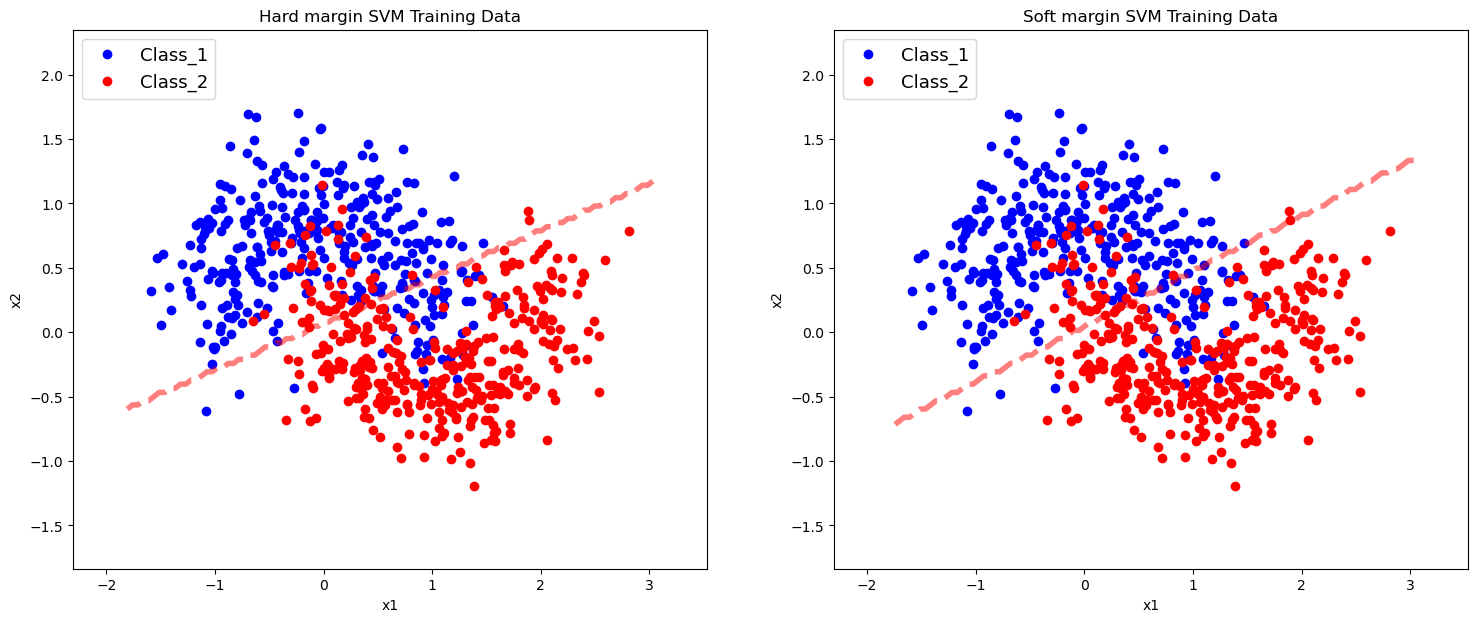

In [10]:
X_moon, y_moon = make_moons(n_samples=1000, shuffle=True, noise=0.3, random_state=36)

## Split
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, test_size=0.3, random_state=42)

## SVM classifier with a linear kernel [HARD and SOFT margins]
clf_hard = SVC(kernel='linear', C=1000)
clf_hard.fit(X_train, y_train)
clf_soft = SVC(kernel='linear', C=0.1)
clf_soft.fit(X_train, y_train)

## Method to plot the decision boundary
def plot_decision_boundary(clf, ax=None, colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'], levels=[-1, 0, 1], alpha=0.5, linewidths=2):
    if ax is None:
        # Get current axes
        ax = plt.gca()                  
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Create level curves for the 2D array
    ax.contour(xx, yy, Z, colors=colors, levels=levels, alpha=alpha, linestyles=linestyles, linewidths=linewidths)     
    ax.set_xlim(x_min - 0.5, x_max + 0.5)
    ax.set_ylim(y_min - 0.5, y_max + 0.5)

In [ ]:
## Plot the hard margin SVM
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
axs[0].plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], 'bo', label='Class_1')
axs[0].plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], 'ro', label='Class_2')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Hard margin SVM Training Data')
axs[0].legend(loc='upper left', fontsize=13)
plot_decision_boundary(clf_hard, axs[0], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'], 
                    levels=[-2, -1, 0, 1, 2], alpha=0.5, linewidths=4)

## Plot the soft margin SVM
axs[1].plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], 'bo', label='Class_1')
axs[1].plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], 'ro', label='Class_2')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Soft margin SVM Training Data')
axs[1].legend(loc='upper left', fontsize=13)
plot_decision_boundary(clf_soft, axs[1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'], 
                    levels=[-2, -1, 0, 1, 2], alpha=0.5, linewidths=4)
plt.show()

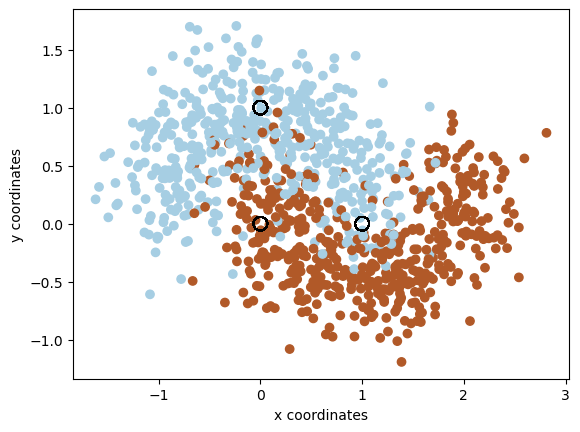

In [11]:
""" Plot decision boundary and data points and highlight the support vectors. """
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap=plt.cm.Paired)
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")

support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.show()

<h2 style="color:#0FA345; margin-bottom: 0.4;"> <u> Example # 3 </u> </h2>
<div style="margin-top: -30px;">
<div style="line-height:1.2; margin-bottom: 0;">
<h4> Kernels </h4>
</div>
</div>

In [6]:
## Generate a two dimensional dataset 
X = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - X**2)
X

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [8]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [7]:
# Stack arrays column wise (horizontally, in sequence)
X = np.hstack([X,-X]) 
y = np.hstack([y,-y])

X

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [11]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

x1[:10], y1[:10]

(array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
        -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909]),
 array([0.        , 0.99994898, 1.40690791, 1.71419826, 1.96904936,
        2.18984681, 2.38606299, 2.563349  , 2.72540153, 2.87479787]))

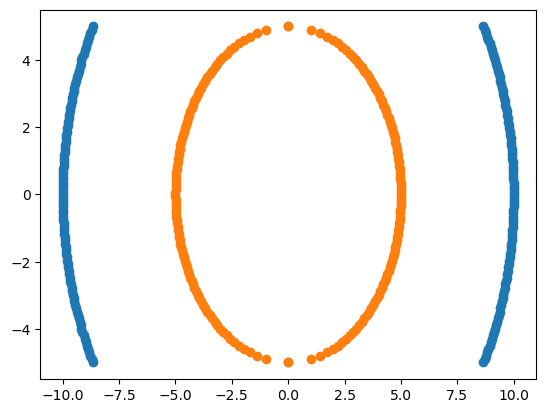

In [13]:
plt.scatter(y, X)
plt.scatter(y1,x1)

In [14]:
""" Create a 2D array where each row contains a pair of values from y_y and x_x.
By stacking y_y and x_x vertically, and transposing (.T) the result.
"""
df1 = pd.DataFrame(np.vstack([y, X]).T,columns=['X1','X2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
#df = df1.append(df2) #FutureWarning: The frame.append method is deprecated
df = pd.concat([df1, df2], ignore_index=True)

df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [33]:
## Get independent and dependent features
X = df.iloc[:, :2]  
y = df.Y

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25,random_state=0)

In [34]:
X.head()

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
395,-1.969049,-4.59596
396,-1.714198,-4.69697
397,-1.406908,-4.79798
398,-0.999949,-4.89899


<h3> Radial Basis Function Kernels:</h3>

<h3> Exponential Kernel </h3>

$K(x,y) = \exp(-\gamma \cdot ||x - y||^2)$

In [25]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

<h3> Polynomial Kernel </h3>

$K(x,y) = (x^T * y + c)^d$

In [26]:
## Get new columns X1_square, X2_square, X1*X2
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [40]:
## SVM classifier with a polynomial kernel of degree 3
classifier = SVC(kernel="poly", degree=3)
classifier.fit(X_train, y_train)

## Prediction 
y_pred = classifier.predict(X_test)

## Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.59


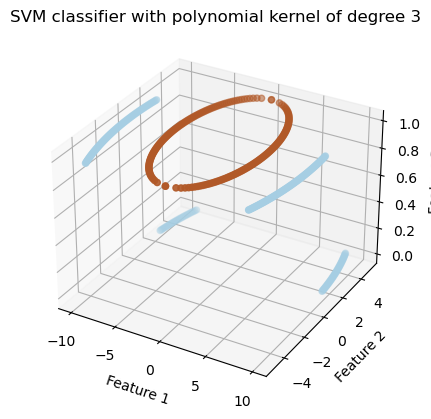

In [41]:
## Plot the classifier in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Z = classifier.predict(X)
#ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap=plt.cm.Paired)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], Z, c=y, cmap=plt.cm.Paired)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('SVM classifier with polynomial kernel of degree 3')
plt.show()

<div style="line-height:0.76">
<h4> Pairplot function </h4> 
</div>
It creates a matrix of plots showing the PAIRWISE relationships between the different features in a dataset. <br>
Therefore, having 5 input features means 6 plots (considering also the single output targets).

Legenda: <br> 
- On the principal diagonal : Univariate distributions of each variable (column) in the dataset, Kernel Density Estimates (KDEs). <br>
- Elsewhere: Scatterplots to show the relationships between pairs of variables. 

N.B. <br>
- Assign pairplot to a variable g to use it later and avoid overlapping between title and figure. <br>
- Dont use => plt.title('Pairplot of the features', loc='center') but exploit the suptitle.

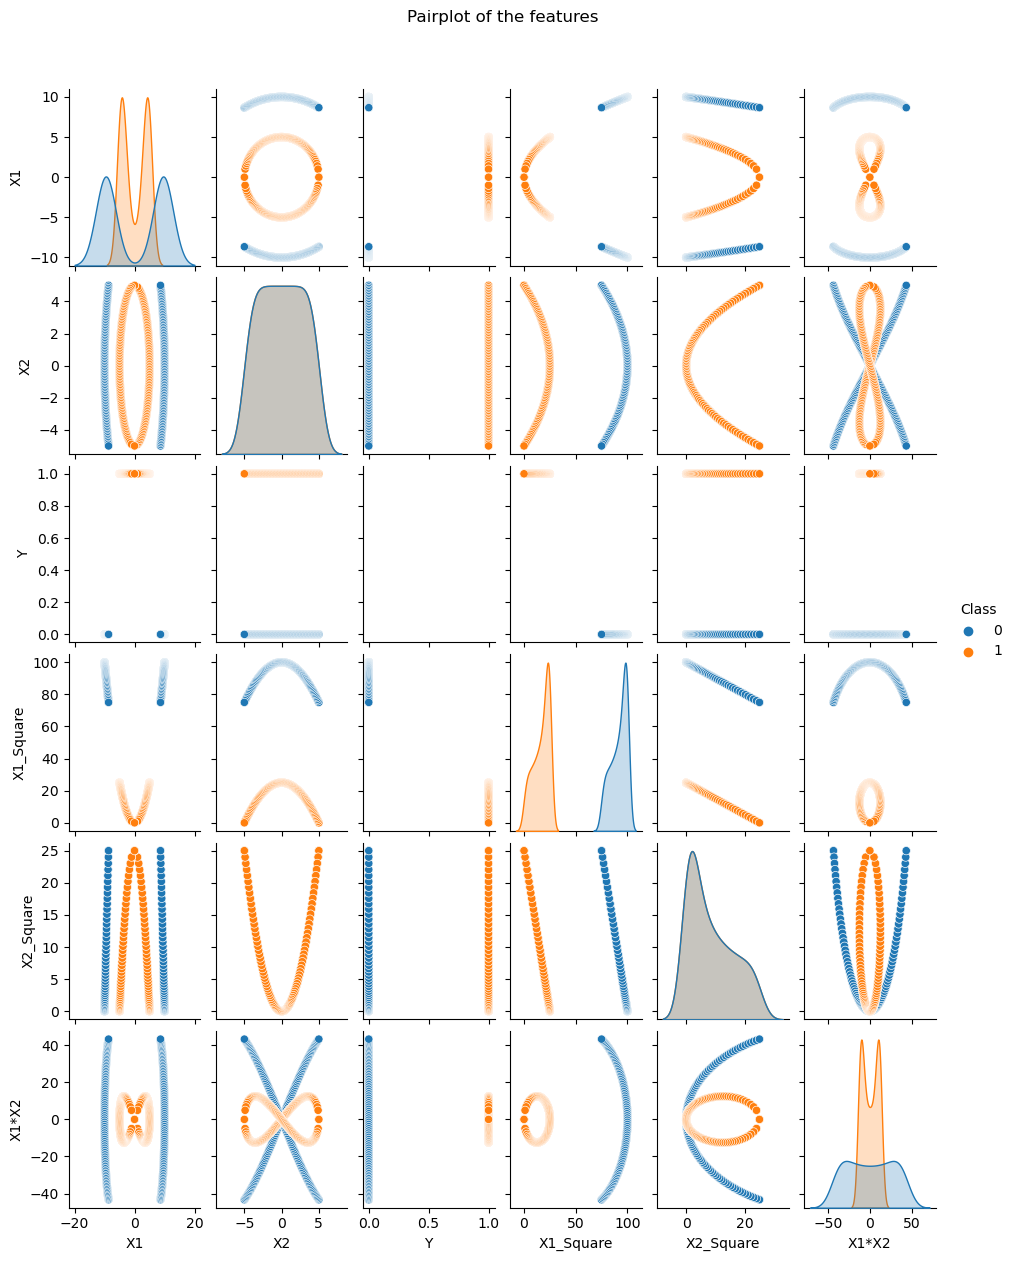

In [42]:
# Add the class label to the DataFrame
df['Class'] = y

## Plot a pairplot with hue='Class'
g = sns.pairplot(data=df, hue='Class', height=2, aspect=0.8)
# Put the title above
g.fig.suptitle('Pairplot of the features', y=1.05) 
plt.show()

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

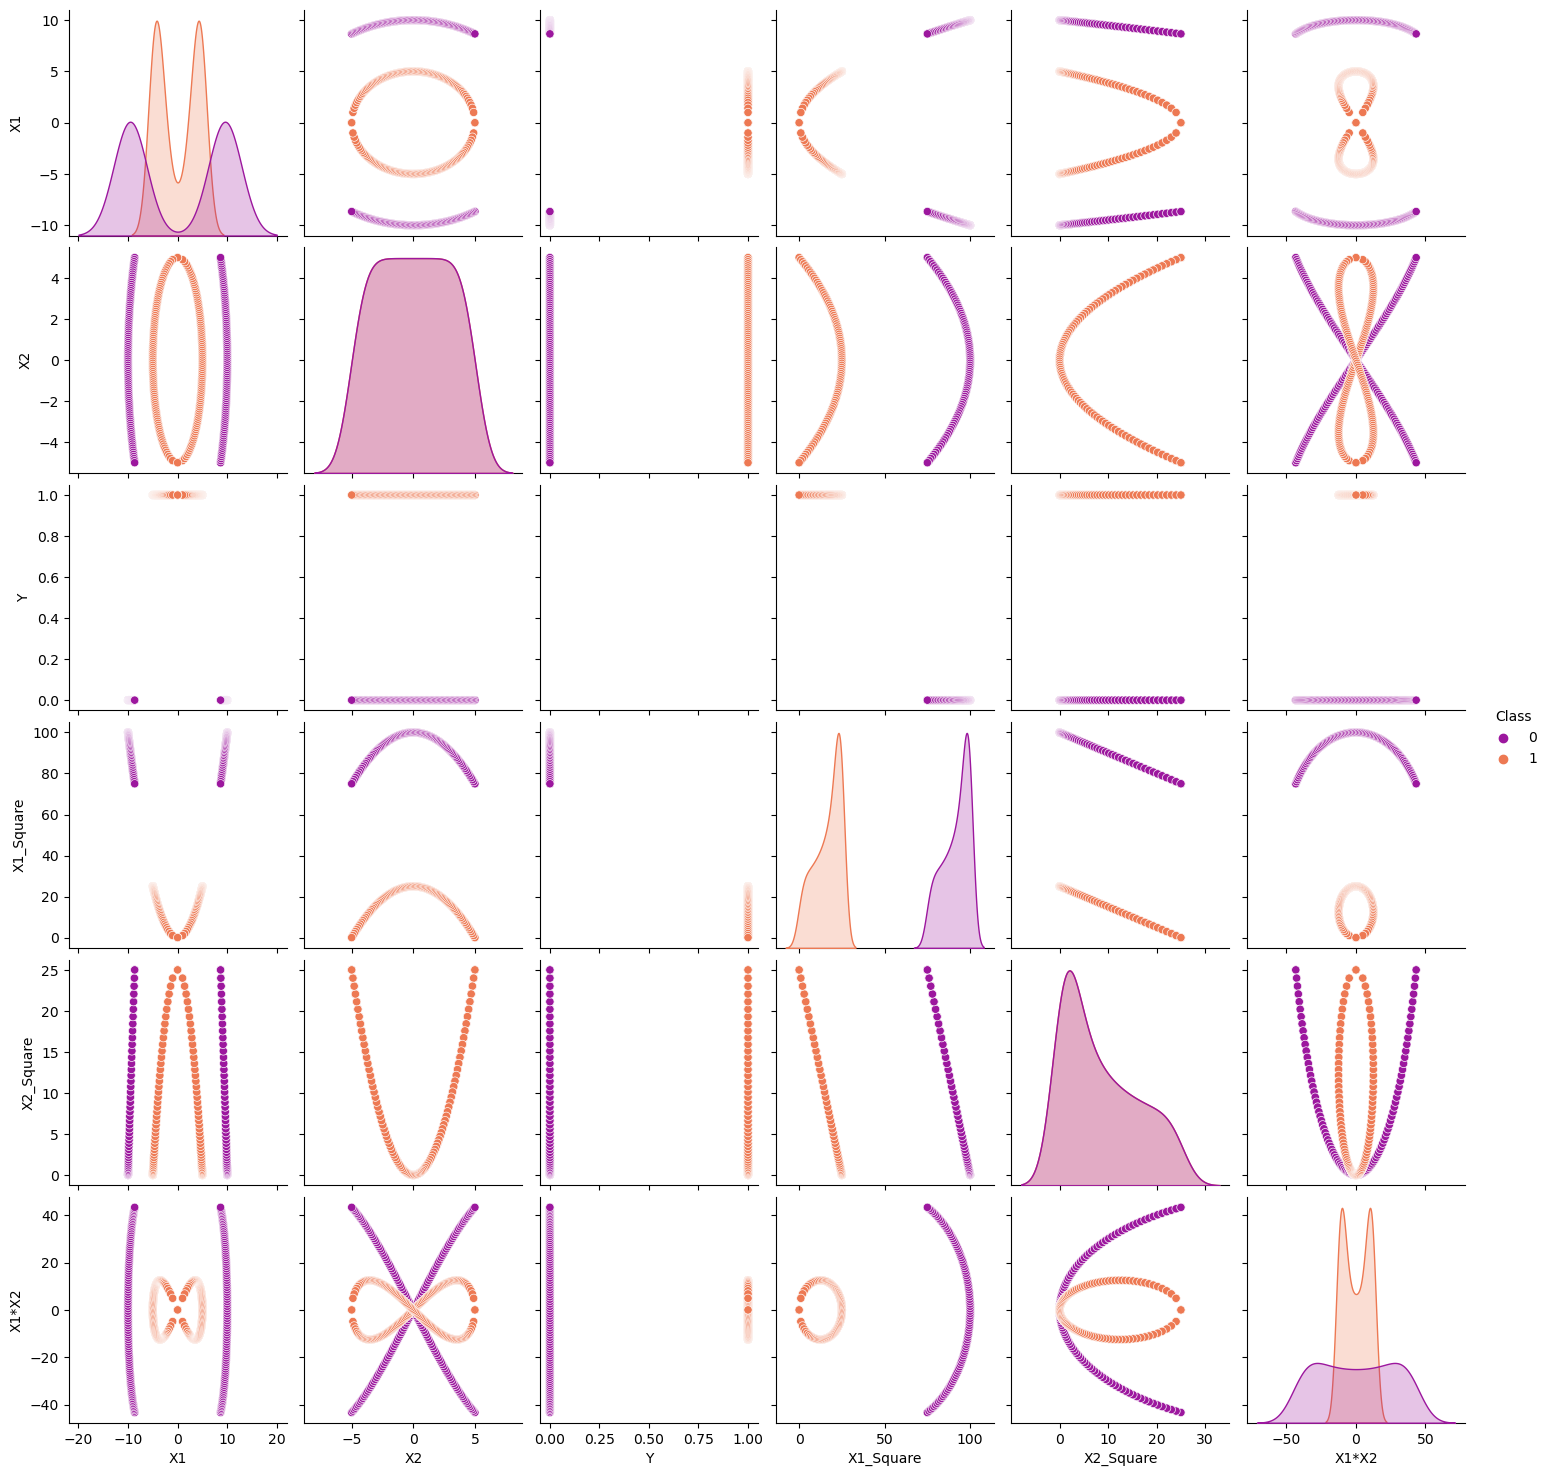

In [47]:
#%matplotlib widget
""" Create an interactive pair_plot visualization of a dataset, using Seaborn.
This interactive tool can be helpful for data relationships exploration 
and gaining insights into the data's patterns and correlations.
"""

def size_widget(height=2.5, aspect=1, kind='scatter', palette='plasma'):
    sns.pairplot(data=df, hue='Class', kind=kind, height=height, aspect=aspect, palette=palette)

interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25), kind=['scatter', 'reg'], 
            palette=['plasma', 'magma', 'viridis'])

In [48]:
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig.update_layout(height=500, width=600)
fig.show()

In [50]:
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2', color='Y')
fig.update_layout(height=500, width=600)
fig.show()

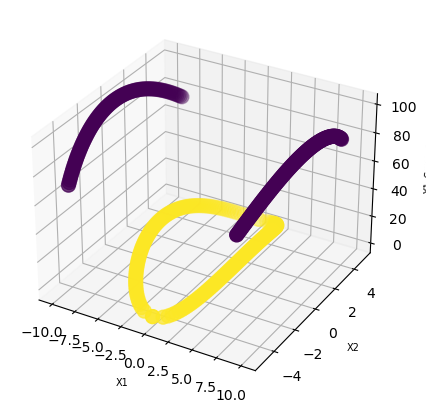

In [51]:
def matplo_3d(X, y):
    fig = plt.figure(figsize=(14, 5)) #hidth, height in inches.
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=100)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X1_Square')
    ax.xaxis.label.set_size(7)
    ax.yaxis.label.set_size(7)
    ax.zaxis.label.set_size(7)    
    #plt.show()

X = df[['X1', 'X2', 'X1_Square']]
y = df['Y']
matplo_3d(X.values, y.values)

<div style="line-height:0.5">
<h2 style="color:#0FA345 "> <u> Example # 4 </u> </h1>
Case with a dataset of random sparse samples not well divided.
</div>

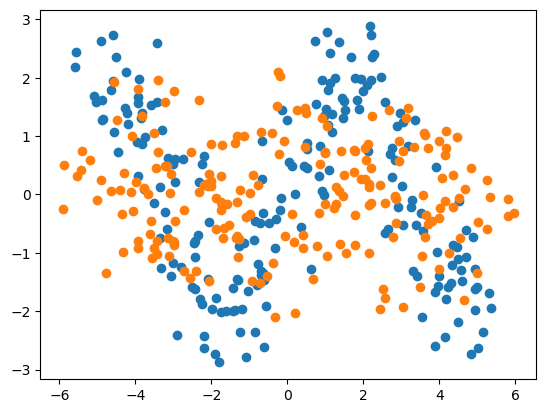

In [52]:
x_x = np.linspace(-5.0, 5.0, 100)
y_y = 2*np.sin(x_x) + np.random.normal(0, 0.5, 100)
y_y = np.hstack([y_y,-y_y])
x_x = np.hstack([x_x,-x_x]) + np.random.normal(0, 0.5, 200)

x_x1 = np.linspace(-5.0, 5.0, 100)
y_y1 = np.cos(x_x1) + np.random.normal(0, 0.5, 100)
y_y1 = np.hstack([y_y1,-y_y1])
x_x1 = np.hstack([x_x1, -x_x1]) + np.random.normal(0, 0.5, 200)

#### Plot the new dataset
plt.scatter(x_x, y_y)
plt.scatter(x_x1, y_y1)
plt.show()

In [53]:
df1 = pd.DataFrame(np.vstack([y_y, x_x]).T,columns=['X1','X2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y_y1,x_x1]).T,columns=['X1','X2'])
df2['Y']=1
#df = df1.append(df2) #=> FutureWarning: The frame.append method is deprecated
df = pd.concat([df1, df2], ignore_index=True)

df.head(5)
## Get new columns X1_square, X2_square, X1*X2
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,1.619749,-4.885187,0,2.623588,23.865053,-7.912778
1,1.790432,-4.648049,0,3.205648,21.604359,-8.322017
2,2.441936,-5.574847,0,5.963050,31.078916,-13.613417
3,1.214898,-4.205916,0,1.475976,17.689728,-5.109757
4,2.623486,-4.908056,0,6.882679,24.089011,-12.876216


In [54]:
#### Split into train and test subsets
X_x = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
Y_y = df['Y']
X_x_train, X_x_test, y_y_train, y_y_test = train_test_split(X_x, Y_y, test_size = 0.25, random_state = 0)

In [55]:
#### Visualize in 3D
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig.update_layout(height=500, width=600)
fig.update_traces(marker=dict(size=5))
fig.show()

In [58]:
X_x_train

,X1,X2,X1_Square,X2_Square,X1*X2
250,2.027966,-0.194173,4.112644,0.037703,-0.393776
63,1.601710,1.496291,2.565474,2.238887,2.396624
312,0.919549,3.993108,0.845571,15.944912,3.671860
159,-1.313342,-0.696227,1.724867,0.484732,0.914384
283,-1.052456,3.544269,1.107664,12.561844,-3.730188
...,...,...,...,...,...
323,1.490483,3.169155,2.221540,10.043545,4.723573
192,2.737054,-4.594274,7.491464,21.107355,-12.574776
117,-0.628448,3.554452,0.394946,12.634132,-2.233787
47,-0.058671,-0.169240,0.003442,0.028642,0.009929


#### => SVC model

In [61]:
## Linear SVM classifier 
classifier4 = SVC(kernel='linear')

## Training
classifier4.fit(X_x_train, y_y_train)

## Predict
y_y_pred = classifier4.predict(X_x_test)

## Accuracy core
accuracy = accuracy_score(y_y_test, y_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.72


classification_report for y_y_test and y_y_pred:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70        55
           1       0.64      0.87      0.74        45

    accuracy                           0.72       100
   macro avg       0.74      0.73      0.72       100
weighted avg       0.75      0.72      0.72       100

confusion matrix pred_clf SVM Classificator
[[33 22]
 [ 6 39]]


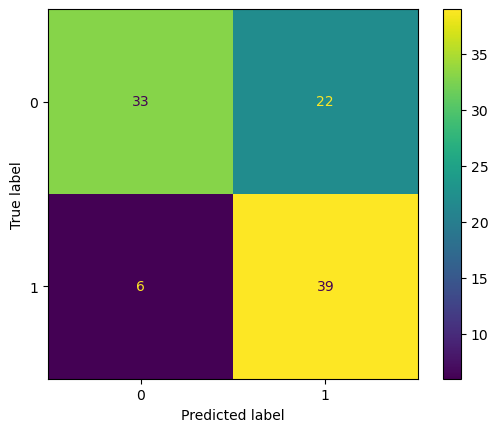

In [62]:
print("classification_report for y_y_test and y_y_pred:")
print(classification_report(y_y_test, y_y_pred))

cm = confusion_matrix(y_y_test, y_y_pred, labels=classifier4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier4.classes_)

print("Confusion matrix pred_clf SVM Classificator:")
print(cm)
disp.plot()
plt.show()

#### => Plot SVM Decision Boundaries for X1 AND X2

/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



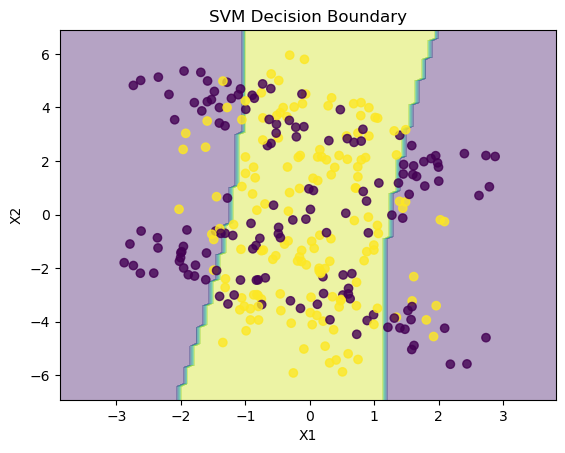

In [68]:
""" Display classification's results. 
N.B.1
- The numpy meshgrid create two 2D arrays (x1 and x2) that represent the coordinates of each point in the meshgrid, \
by calculating the minimum and maximum values for each of the two input features in the training dataset.
N.B.2
- The additional features added for the meshgrid by computing the square of x1, the square of x2, and the product of x1 and x2, \
are necessary because the SVM classifier was trained on a dataset with five features, \ 
including all possible combinations of the original two features.    
N.B.3
- The features are then combined into a single array by concatenating the arrays for x1, x2, x1_square, x2_square, and x1x2 \
along the columns using np.c_. 
N.B.4
- Reshape the predictions into a 2D array to that has the same shape as the meshgrid. 
"""

## Meshgrid of points that covers the range of the input features
x1_min, x1_max = X_x_train.iloc[:, 0].min() - 1, X_x_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_x_train.iloc[:, 1].min() - 1, X_x_train.iloc[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                    np.arange(x2_min, x2_max, 0.1))

# Create additional features for the meshgrid
x1_square = x1**2
x2_square = x2**2
x1x2 = x1*x2

# Combine the features into a single array (flattening each array into a 1D array before concatenating)
X_mesh = np.c_[x1.ravel(), x2.ravel(), x1_square.ravel(), x2_square.ravel(), x1x2.ravel()] 

# Classify each point in the meshgrid using the SVM classifier
Z = classifier4.predict(X_mesh)

# Reshape the predictions into a 2D array
Z = Z.reshape(x1.shape)

##### Plot the decision boundary and the training data
plt.contourf(x1, x2, Z, alpha=0.4)
plt.scatter(X_x_train.iloc[:, 0], X_x_train.iloc[:, 1], c=y_y_train, alpha=0.8)
plt.xlabel(X_x_train.columns[0])
plt.ylabel(X_x_train.columns[1])
plt.title('SVM Decision Boundary')
plt.show()

#### => Hyperparameters tuning

In [64]:
# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': [0.1, 1, 10, 100]}

# Create a GridSearchCV object with the SVM classifier and hyperparameter grid
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_x_train, y_y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best accuracy score:  0.7


#### => Classifiers comparison

In [66]:
""" - LogisticRegression / DecisionTreeClassifier / RandomForestClassifier """

# Create and train a Logistic Regression 
log_reg = LogisticRegression()
log_reg.fit(X_x_train, y_y_train)

# Create and train a Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_x_train, y_y_train)

# Create and train a Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_x_train, y_y_train)

### Evaluate the performance (accuracies) of each classifier on test data 
print("Logistic Regression Accuracy is:", accuracy_score(y_y_test, log_reg.predict(X_x_test)))
print("Decision Tree Accuracy is:", accuracy_score(y_y_test, dtc.predict(X_x_test)))
print("Random Forest Accuracy is:", accuracy_score(y_y_test, rfc.predict(X_x_test)))

Logistic Regression Accuracy: 0.69
Decision Tree Accuracy: 0.75
Random Forest Accuracy: 0.75
